<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from tensorflow.keras.datasets import reuters
import numpy as np

# np_load_old = np.load
# np.load.__defaults__=(None, True, True, 'ASCII')

# np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [0]:
np.load = np_load_old

In [0]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
word_index

In [0]:
# TODO - your code!
'''
#Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
**Notes**
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
print(len(X_train[0]), 'train sequences')
print(len(X_test), 'test sequences')


80 train sequences
2246 test sequences


In [0]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (8982, 80)
X_test shape: (2246, 80)


In [0]:
len(set(y_train))

46

In [0]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [0]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(sparse=False) # Key here is sparse=False!
# y_train2 = enc.fit_transform(y_train.reshape((y_train.shape[0]),1))



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
# y_test2 = enc.fit_transform(y_test.reshape((y_test.shape[0]),1))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
y_train2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  248,  409,  166,  265, 1537, 1662,    8,
         24,    4, 1222, 2771,    7,  227,  236,   40,   85,  944,   10,
        531,  176,    8,    4,  176, 1613,   24, 1662,  297, 5157,    6,
         10,  103,    5,  231,  215,    8,    7, 2889,    6,   10, 1202,
         69,    4, 1222,  329, 2771,   24,  944,   23,  944, 1662,   40,
       2509, 1592,  907,   69,    4,  113,  997,  762, 2539,    7,  227,
        236,   17,   12], dtype=int32)

In [0]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,  248,  409,  166,  265, 1537, 1662,    8,
         24,    4, 1222, 2771,    7,  227,  236,   40,   85,  944,   10,
        531,  176,    8,    4,  176, 1613,   24, 1662,  297, 5157,    6,
         10,  103,    5,  231,  215,    8,    7, 2889,    6,   10, 1202,
         69,    4, 1222,  329, 2771,   24,  944,   23,  944, 1662,   40,
       2509, 1592,  907,   69,    4,  113,  997,  762, 2539,    7,  227,
        236,   17,   12], dtype=int32)

In [0]:
word_index['iran']

779

In [0]:
y_train[:5]

array([19, 41, 16,  3,  4])

In [0]:
X_train[:5]

In [0]:
len(word_index)

30979

In [0]:
vocab[:10]

In [0]:
round((len(X_train) /80)+0.5)

113

In [0]:
max_features = round(len(word_index)/3)
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size =  round((len(X_train) /80)+0.5)

In [0]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [0]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(46, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 18s 2ms/step - loss: 2.6234 - acc: 0.3460 - val_loss: 2.2620 - val_acc: 0.3664
Epoch 2/10
8982/8982 [==============================] - 14s 2ms/step - loss: 2.0523 - acc: 0.4768 - val_loss: 1.7887 - val_acc: 0.5214
Epoch 3/10
8982/8982 [==============================] - 14s 2ms/step - loss: 1.7545 - acc: 0.5386 - val_loss: 1.6983 - val_acc: 0.5454
Epoch 4/10
8982/8982 [==============================] - 14s 2ms/step - loss: 1.6380 - acc: 0.5659 - val_loss: 1.5959 - val_acc: 0.5864
Epoch 5/10
8982/8982 [==============================] - 13s 2ms/step - loss: 1.4731 - acc: 0.6156 - val_loss: 1.4905 - val_acc: 0.6162
Epoch 6/10
8982/8982 [==============================] - 14s 2ms/step - loss: 1.2940 - acc: 0.6614 - val_loss: 1.4452 - val_acc: 0.6376
Epoch 7/10
8982/8982 [==============================] - 13s 1ms/step - loss: 1.1377 - acc: 0.6986 - val_loss: 1.4042 -

In [0]:
model.predict(X_test[0])

array([[0.02371303, 0.01749728, 0.02312479, ..., 0.0309648 , 0.01468338,
        0.02053163],
       [0.0214421 , 0.02285872, 0.02043433, ..., 0.01907314, 0.01909348,
        0.01936254],
       [0.02585293, 0.01611699, 0.02290446, ..., 0.03082579, 0.01848697,
        0.02531085],
       ...,
       [0.01957988, 0.01727109, 0.01920857, ..., 0.02185427, 0.02467752,
        0.02025913],
       [0.01423552, 0.03313363, 0.01899415, ..., 0.011868  , 0.00931909,
        0.00832499],
       [0.00973892, 0.03122943, 0.016973  , ..., 0.00877556, 0.00444829,
        0.00560481]], dtype=float32)

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [0]:
!pip install google_images_download

     |████████████████████████████████| 911kB 9.4MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=f43cee702e59d8d5587a9e0eb02479dc61944780b05caf86e20e2f6c308e9f00
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [114]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 20, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 4.PKLS4116.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://cdn.pixabay.com/photo/2017/04/19/20/37/frog-2243543_960_720.jpg
Completed Image ====> 6.frog-2243543_960_720.jpg
Image URL: https://i.pinimg.com/origina

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [0]:
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd
import tensorflow as tf
import tensorflow_hub as hub
import imageio
from google_images_download import google_images_download
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image, ImageOps
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.filters import gaussian
from skimage.measure import ransac
from skimage.transform import AffineTransform
from skimage import color, io
from skimage.exposure import rescale_intensity

In [116]:
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
height, width

(224, 224)

In [117]:
image_list = absolute_image_paths[0]['animal pond']
image_list

['/content/downloads/animal pond/1.Pondanimals.GIF',
 '/content/downloads/animal pond/2.hqdefault.jpg',
 '/content/downloads/animal pond/3.PKLS4116_inline.png',
 '/content/downloads/animal pond/4.PKLS4116.png',
 '/content/downloads/animal pond/5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg',
 '/content/downloads/animal pond/6.frog-2243543_960_720.jpg',
 '/content/downloads/animal pond/7.12aee2aa186a7b69a66563f138bba822.jpg',
 '/content/downloads/animal pond/8.Alligator_animal_on_pond.jpg',
 '/content/downloads/animal pond/9.Pond%20Map.gif',
 '/content/downloads/animal pond/10.Gold-fish.jpg',
 '/content/downloads/animal pond/11.goose-2650209_960_720.jpg',
 '/content/downloads/animal pond/12.urban-wildlife-morningside-red-ear-slider-lg.jpg',
 '/content/downloads/animal pond/13.06af3a_f89e7596d5254e6e8896f054e8c4ea7b~mv2_d_1650_1275_s_2.jpg',
 '/content/downloads/animal pond/14.87827228_XS.jpg',
 '/content/download

In [0]:
def resize_image(filename, new_width=224, new_height=224):
    pil_image = Image.open(filename)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert('RGB')
    pil_image_rgb.save(filename, format='JPEG', quality=90)
#     print(filename)
    return filename

In [119]:
images = [resize_image(image) for image in image_list]
images

['/content/downloads/animal pond/1.Pondanimals.GIF',
 '/content/downloads/animal pond/2.hqdefault.jpg',
 '/content/downloads/animal pond/3.PKLS4116_inline.png',
 '/content/downloads/animal pond/4.PKLS4116.png',
 '/content/downloads/animal pond/5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg',
 '/content/downloads/animal pond/6.frog-2243543_960_720.jpg',
 '/content/downloads/animal pond/7.12aee2aa186a7b69a66563f138bba822.jpg',
 '/content/downloads/animal pond/8.Alligator_animal_on_pond.jpg',
 '/content/downloads/animal pond/9.Pond%20Map.gif',
 '/content/downloads/animal pond/10.Gold-fish.jpg',
 '/content/downloads/animal pond/11.goose-2650209_960_720.jpg',
 '/content/downloads/animal pond/12.urban-wildlife-morningside-red-ear-slider-lg.jpg',
 '/content/downloads/animal pond/13.06af3a_f89e7596d5254e6e8896f054e8c4ea7b~mv2_d_1650_1275_s_2.jpg',
 '/content/downloads/animal pond/14.87827228_XS.jpg',
 '/content/download

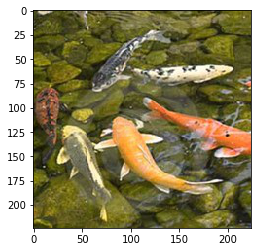

In [120]:
plt.imshow(np.asarray(Image.open(images[1])))

In [0]:
target_map = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt').content

In [122]:
! wget https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

--2019-08-23 16:17:32--  https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.167.128, 2a00:1450:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.167.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt.1’

ImageNetLabels.txt. 100%[===================>]  10.24K  --.-KB/s    in 0s      

2019-08-23 16:17:32 (74.2 MB/s) - ‘ImageNetLabels.txt.1’ saved [10484/10484]



In [123]:
real_images = np.array([np.asarray(Image.open(image)) / 255 for image in images])
real_images.shape

(20, 224, 224, 3)

In [0]:
# TF Hub landing page example
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow as tf

module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
#images = [load_and_preprocess_image(i, width, height) for i in images_path]
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  sess.run(tf.tables_initializer())
  logits = module(real_images).eval()

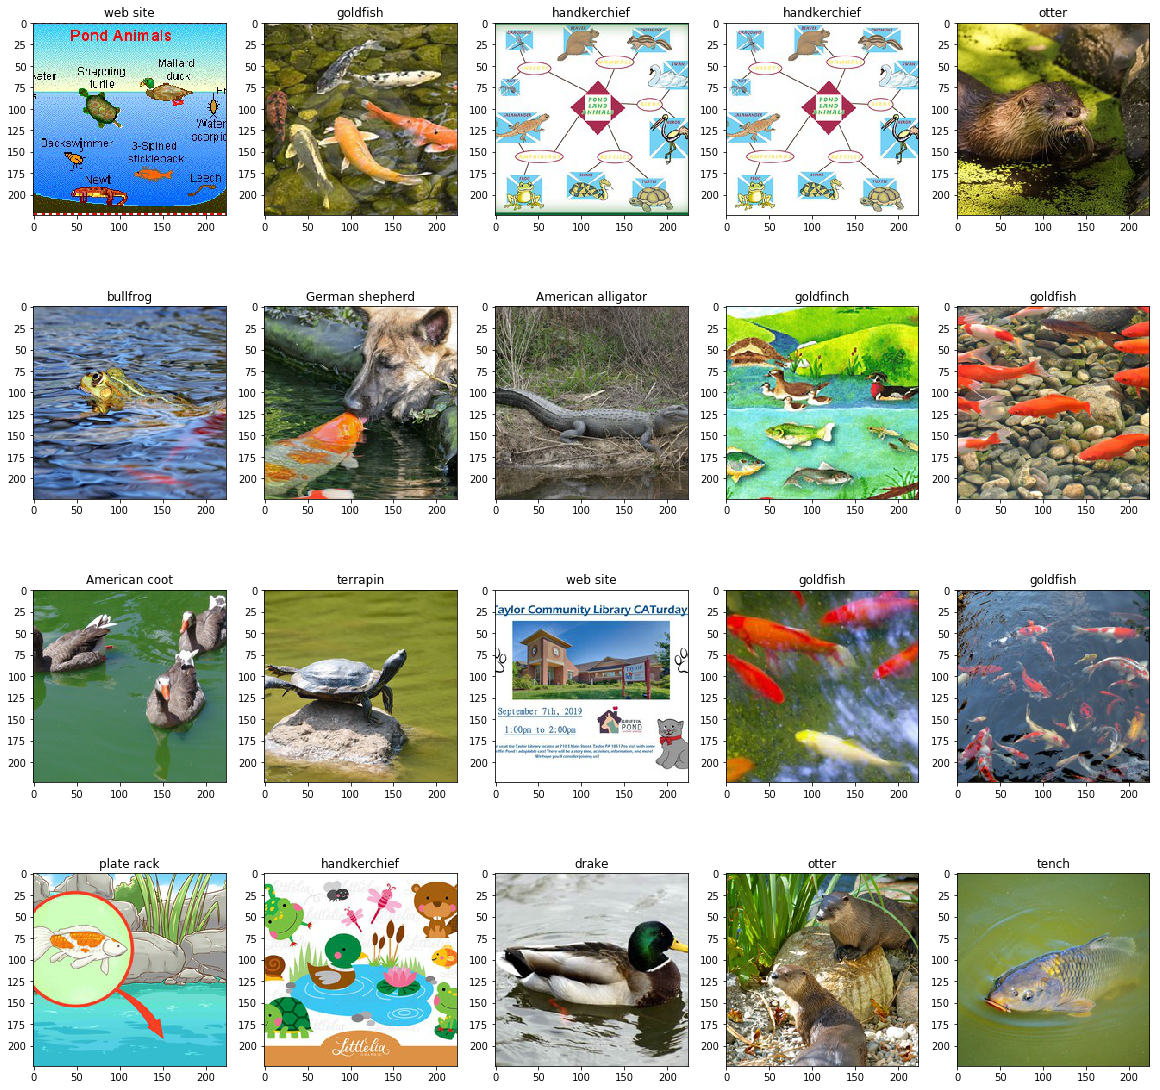

In [125]:
# let's plot!
import math
cols = 5
rows = math.ceil(len(real_images)/5)
fig=plt.figure(figsize=(20, 20))
with open('ImageNetLabels.txt') as f:
  labels = [line.strip() for line in f.readlines()]
with tf.Session() as sess:
  for idx,image in enumerate(real_images):
    fig.add_subplot(rows, cols, idx+1)
    plt.imshow(image)
    plt.title(labels[np.argmax(logits[idx])])


  
plt.show()

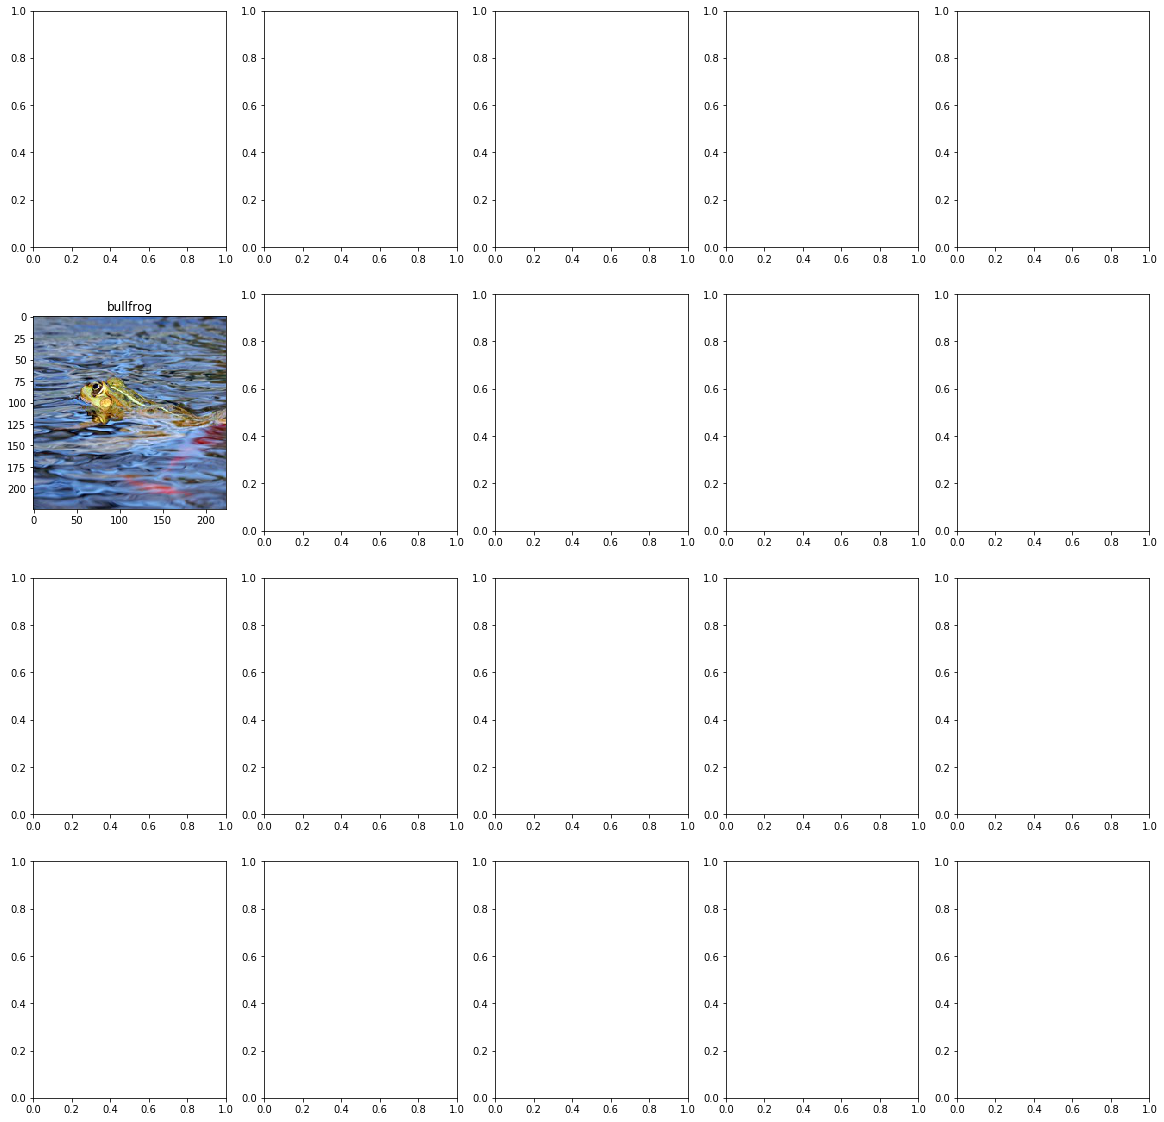

In [128]:
# let's plot!
import math
cols = 5
rows = math.ceil(len(real_images)/5)
fig=plt.figure(figsize=(20, 20))
with open('ImageNetLabels.txt') as f:
  labels = [line.strip() for line in f.readlines()]
with tf.Session() as sess:
  for idx,image in enumerate(real_images):
    fig.add_subplot(rows, cols, idx+1)
    if labels[np.argmax(logits[idx])] in [ 'bullfrog','tree frog', 'tailed frog']:
      plt.imshow(image)
      plt.title(labels[np.argmax(logits[idx])])


  
plt.show()

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

Autoecnoders basically uses an unsupervised learning technique, where the image of the input itself is the the target label. This technique is both used for ifnormation or image retreival, and for image generation.

One interesting use case is removing noise from images or sounds.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

I am resourceful, so i would say my strongest suit is finding a solution to a problem. And relating elements in order to properly clean and choose features. My weakness is basically Python syntax, and not organisation.

- What area of Data Science would you most like to learn more about, and why?
Both supervsied machine learning and deep learning. The first because its in high demand, and the second because that the future.

- Where do you think Data Science will be in 5 years?
Automated and in table forms

- What are the threats posed by AI to our society?
Abuse. Abusing content creation, abusing facial recognition by goverments against protestors, fake information, and monopoly of insight.

- How do you think we can counteract those threats? 

Creating a mandotory secured signature to be added to generated content by open sourced models, in order to avoid abuse. And to create anti-model modles that can detects fake and real.

- Do you think achieving General Artifical Intelligence is ever possible?
Yes! But it will be a human AGI relaitonship and not a simply autonomious one.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")